<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da04_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [1]:
import matplotlib.pyplot as plt  # 시각화 모듈
import numpy as np  # ndarray(배열)
import pandas as pd  # DataFrame, Series
import seaborn as sns  # 시각화 모듈, 예제 데이터셋

# 데이터 셋 준비

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()  # tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# `matplotlib.pyplot` 모듈을 사용한 시각화

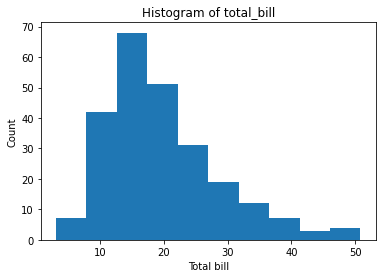

In [23]:
# 1. figure 객체 생성.
fig = plt.figure()

# 2. figure 객체에 subplot(들)을 추가.
# figure.add_subplot(nrows, ncols, index): subplot의 행 개수, 열 개수, 위치(인덱스)
# axis = fig.add_subplot(1, 1, 1)

# figure.add_subplot(pos): '행/열/위치' 순서로 만들어진 3자리 정수
axis = fig.add_subplot(111)

# 3. 각각의 subplot에 그래프를 그림.
axis.hist(x=tips['total_bill'])  # total_bill 컬럼의 히스토그램(histogram)

# 4. 그래프 옵션(들)을 설정.
axis.set_title('Histogram of total_bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기.
plt.show()

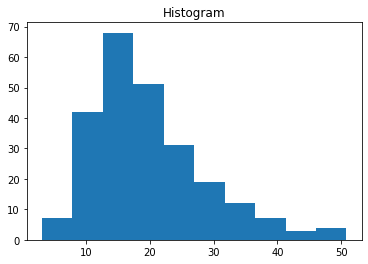

In [33]:
# 1. figure 객체 생성 + subplot 추가
fig, ax = plt.subplots()  # nrows=1, ncols=1: default argument
# print(fig)
# print(ax)

# 2. subplot에 그래프를 그림
ax.hist(x=tips['total_bill'])

# 3. 옵션 설정
ax.set_title('Histogram')

# 4. 그래프 보여줌.
plt.show()

1개의 figure에 1개의 subplot만 있는 경우에는, `pyplot` 모듈의 top-level 그래프 함수(plot, scatter, hist, boxplot, ...)를 직접 이용할 수도 있음.

top-level 함수를 사용하면 figure 생성과 1개의 subplot 추가를 별도의 코드로 작성할 필요가 없음.

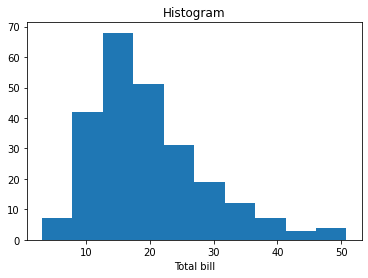

In [36]:
# figure 생성 + subplot을 추가 + 그래프 추가
plt.hist(x=tips['total_bill'])

# 옵션 설정
plt.title('Histogram')
plt.xlabel('Total bill')

# 그래프 보여주기
plt.show()

*   1개의 figure에 2개의 suplot들을 위/아래로 배치.
*   위쪽 subplot에는 total_bill 히스트로그램을 그림.
*   아래쪽 subplot에는 x축은 total_bill, y축은  tip으로 하는 산점도 그래프.

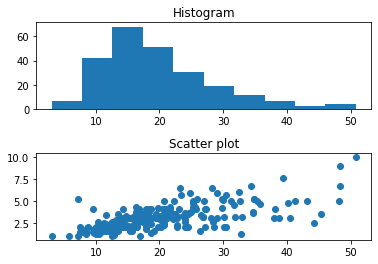

In [48]:
fig = plt.figure()  # Figure 객체 생성

axis1 = fig.add_subplot(2, 1, 1)  # Figure 객체에 Subplot 객체를 위쪽에 추가
axis2 = fig.add_subplot(212)  # Figure 객체에 Subplot 객체를 아래쪽에 추가

axis1.hist(x=tips.total_bill)  # 위쪽 subplot에 히스토그램을 그림.
axis2.scatter(x=tips.total_bill, y=tips.tip)  # 아래쪽 subplot에 산점도 그림.

axis1.set_title('Histogram')  # 옵션
axis2.set_title('Scatter plot')

plt.subplots_adjust(hspace=0.5)  # subplot들 간의 horizontal space
plt.show()

*   1개의 figure에 2개의 suplot들을 좌/우로 배치.
*   왼쪽 subplot에는 total_bill 히스트로그램을 그림.
*   오른쪽 subplot에는 x축은 total_bill, y축은  tip으로 하는 산점도 그래프.

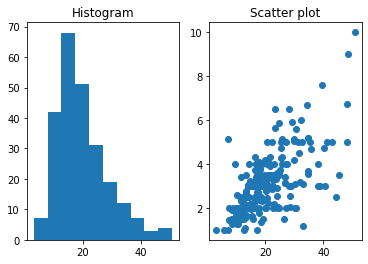

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2)  # Figure 생성 + Subplot 추가
# fig: Figure 객체
# axes: Subplot 객체들의 배열(ndarray)
# print(axes)

axes[0].hist(x=tips.total_bill)  # 왼쪽 Subplot에 히스토그램을 그림.
axes[1].scatter(x=tips.total_bill, y=tips.tip)  # 오른쪽 Subplot에 산점도를 그림.

axes[0].set_title('Histogram')
axes[1].set_title('Scatter plot')

plt.show()

# Box Plot

숫자 타입 변수(컬럼)의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값) 시각화.

데이터들이 어느 정도 분산되어 있는 지, 이상치(outlier)들이 있는 지 등을 확인.

In [56]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

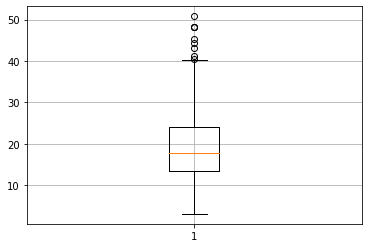

In [58]:
plt.boxplot(x=tips.total_bill)
plt.grid()
plt.show()

In [ ]:
# 1개의 figure와 subplot 안에 total_bill의 boxplot, tip의 boxplot을 시각화.